In [14]:
import sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

with open('/Users/adamurquhart/coding/visual_studio/qardio/creds.json') as f:
    creds = json.load(f)


database = 'testing'
host = '192.168.50.49'
user = creds['mysql']['user']
password = creds['mysql']['password']
url = f'mysql+mysqlconnector://{user}:{password}@{host}/{database}'
engine = sqlalchemy.create_engine(url, echo=True)
conn = engine.connect()

root
2023-06-24 19:36:42,413 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2023-06-24 19:36:42,414 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-06-24 19:36:42,423 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2023-06-24 19:36:42,424 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-06-24 19:36:42,432 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2023-06-24 19:36:42,433 INFO sqlalchemy.engine.Engine [raw sql] {}


In [3]:
# query database
existing_data = pd.read_sql(sql='SELECT * FROM first_test;', con=conn)
existing_data

2023-06-24 17:45:54,380 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2023-06-24 17:45:54,383 INFO sqlalchemy.engine.Engine [generated in 0.00843s] {'table_schema': 'testing', 'table_name': 'SELECT * FROM first_test;'}
2023-06-24 17:45:54,407 INFO sqlalchemy.engine.Engine SELECT * FROM first_test;
2023-06-24 17:45:54,411 INFO sqlalchemy.engine.Engine [raw sql] {}


,id,name,age
0,1,Adam,26
1,2,Adam,26
2,3,Adam,26


In [24]:
existing_data.date = pd.to_datetime(existing_data.week)
existing_data = existing_data.set_index('week')
existing_data = existing_data.fillna(0)

/var/folders/bf/_zklb1pd4yd0gxg2hm5dg22w0000gn/T/ipykernel_4179/2628856393.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  existing_data.date = pd.to_datetime(existing_data.week)


(array([18993., 19052., 19113., 19174., 19236., 19297., 19358., 19417.,
        19478., 19539.]),
 [Text(18993.0, 0, '2022-01'),
  Text(19052.0, 0, '2022-03'),
  Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07')])

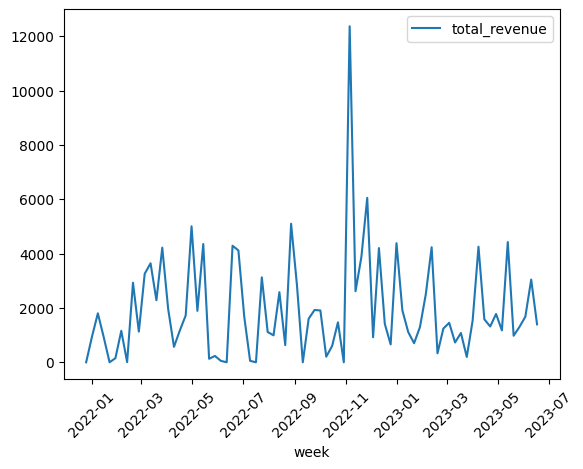

In [32]:
# existing_data = existing_data.set_index('weekstart')
sns.lineplot(existing_data)
plt.tight_layout
plt.xticks(rotation=45)

In [35]:
existing_data.head()

,total_revenue
week,
2021-12-25,0.00
2022-01-01,943.00
2022-01-08,1801.31
2022-01-15,925.69
2022-01-22,0.00


In [36]:
def add_date_cols(df):
    df = df.copy()
    df['weekofyear'] = df.index.dt.week
    
    return df

In [ ]:
from xgboost import XGBRegressor

reg = XGBRegressor()
reg.